<a href="https://colab.research.google.com/github/mra49/Capstone/blob/main/Market_Basket_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Also sleeps

In [50]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Capstone/with_rate_old_prices.csv")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-50-e0d6c4898cb8>:2: DtypeWarning: Columns (5,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/Capstone/with_rate_old_prices.csv")


In [51]:
# import pandas as pd

# # Assuming df is your DataFrame

# # Calculate the number of transactions for each item
# transactions_per_item = df['Item Number'].value_counts()

# # Calculate the total quantities sold for each item
# total_qty_per_item = df.groupby('Item Number')['QTY'].sum()

# # Calculate the total extended price for each item
# total_extended_price_per_item = df.groupby('Item Number')['Extended Price'].sum()

# # Calculate the total extended price of all items
# total_extended_price = df['Extended Price'].sum()

# # Calculate the percentage of total extended price for each item
# percentage_of_total = (total_extended_price_per_item / total_extended_price) * 100

# # Combine all these into a single DataFrame
# result = pd.DataFrame({
#     'Number of Transactions': transactions_per_item,
#     'Total Quantity Sold': total_qty_per_item,
#     'Percentage of Total Extended Price': percentage_of_total
# })

# # Sort the results by 'Total Quantity Sold' in descending order
# sorted_result = result.sort_values(by='Number of Transactions', ascending=False)

# print(sorted_result['Number of Transactions'].tail(320))#['Percentage of Total Extended Price'].head(50).sum()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [52]:
import pandas as pd

# Assuming df is your DataFrame

# Calculate the number of transactions for each item
transactions_per_item = df['Item Number'].value_counts()

# Filter out items with less than 10 transactions
filtered_transactions = transactions_per_item[transactions_per_item >= 50]

# Print the number of unique Item Numbers before filtering
print("Unique Item Numbers before filtering:", df['Item Number'].nunique())

# Print the number of unique Item Numbers after filtering
print("Unique Item Numbers after filtering:", filtered_transactions.count())

# Creating a filtered DataFrame based on the filtered items
filtered_df = df[df['Item Number'].isin(filtered_transactions.index)]

# Calculate the total quantities sold for each item
total_qty_per_item = filtered_df.groupby('Item Number')['QTY'].sum()

# Calculate the total extended price for each item
total_extended_price_per_item = filtered_df.groupby('Item Number')['Extended Price'].sum()

# Calculate the total extended price of all items
total_extended_price = filtered_df['Extended Price'].sum()

# Calculate the percentage of total extended price for each item
percentage_of_total = (total_extended_price_per_item / total_extended_price) * 100

# Adding Product Type (assuming it's a column in df)
product_type_per_item = filtered_df.groupby('Item Number')['product_type'].first()

# Combine all these into a single DataFrame
result = pd.DataFrame({
    'Item Number': filtered_transactions.index,
    'Number of Transactions': filtered_transactions.values,
    'Total Quantity Sold': total_qty_per_item,
    'Percentage of Total Extended Price': percentage_of_total,
    'Product Type': product_type_per_item
})

# Sort the results by 'Percentage of Total Extended Price' in descending order
sorted_result = result.sort_values(by='Percentage of Total Extended Price', ascending=False)

print(sorted_result)

Unique Item Numbers before filtering: 1062
Unique Item Numbers after filtering: 189
            Item Number  Number of Transactions  Total Quantity Sold  \
Item Number                                                            
76084             56962                     391                71666   
56826             76018                     903               107699   
56826             15038                     114                18892   
55610             56945                    1132                30918   
76084             76611                      77                15634   
...                 ...                     ...                  ...   
76651             56812                     186                 1280   
76326             76618                     333                 2983   
76611             52803                     208                  978   
76626             13048                     187                 1196   
76620             76610                     192     

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [53]:
import pandas as pd

# Count the occurrences of each 'Item Number'
item_counts = df['Item Number'].value_counts()

# Find the 'Item Number' values that appear 50 times or more
items_to_keep = item_counts[item_counts >= 50].index

# Filter the original DataFrame to keep only those 'Item Number' entries
df = df[df['Item Number'].isin(items_to_keep)]

# Now 'filtered_df' contains only the rows where 'Item Number' appeared 50 times or more


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [54]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Assuming 'df' is your dataframe after loading your data

# Grouping the data by 'SOP Number' to create a basket (list of items per invoice)
baskets = df.groupby('SOP Number')['Item Description'].apply(list).reset_index(name='Items')

# Creating a list of transactions
transactions = baskets['Items'].tolist()

# One-hot encoding
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
one_hot_df = pd.DataFrame(te_ary, columns=te.columns_)

# Proceed with Apriori algorithm and Association Rules (as shown in the previous step)
# ...


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [55]:
# Check the first few transactions
print(transactions[:5])

# Check the shape of the one-hot encoded DataFrame
print(one_hot_df.shape)

# Verify that there are no all-zero columns or rows which might indicate issues
print('Columns with all zeros:', one_hot_df.columns[(one_hot_df.sum(axis=0) == 0)])
print('Rows with all zeros:', one_hot_df.index[(one_hot_df.sum(axis=1) == 0)])

# Calculate and print basic statistics
print('Total number of transactions:', len(transactions))
print('Average number of items per transaction:', one_hot_df.sum(axis=1).mean())
print('Most common items:', one_hot_df.sum(axis=0).sort_values(ascending=False).head())

# Additional preprocessing
# Example: Removing items that occur less than 3 times
item_supports = one_hot_df.sum(axis=0)
one_hot_df_filtered = one_hot_df.loc[:, item_supports >= 3]

# Check the new shape after filtering
print(one_hot_df_filtered.shape)


[['style shower gel peach 100ml', 'style shower gel sweet excape 1000ml'], ['foamy multi-use shampoo apple 5100ml', 'foamy multi-use shampoo apple 5100ml', 'x-pert shampoo rose 6l', 'x-pert shampoo rose 6l', 'foamy dishwash 6000ml', 'foamy dishwash 6000ml', 'foamy general cleaner 6000ml', 'foamy general cleaner 6000ml'], ['x-pert shampoo rose 6l', 'x-pert shampoo rose 6l', 'foamy multi-use shampoo apple 5100ml', 'foamy multi-use shampoo apple 5100ml', 'foamy dishwash 6000ml', 'foamy dishwash 6000ml', 'foamy general cleaner 6000ml', 'foamy general cleaner 6000ml'], ['style cool ocean shampoo 2250', 'style shampoo m.islands 2250ml', 'style shampoo apple blossom 22', 'style alpine herbs shampo 2250', 'style apple blossom sh. 4000ml', 'style alpine herbs sh. 4000 ml', 'style cool ocean sh. 4000 ml', 'style shampoo meridian 4000ml', 'style shampoo milk & coconut 4', 'style cool ocean shampoo 2250', 'style shampoo apple blossom 22', 'style apple blossom sh. 4000ml'], ['style apple blossom sh

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [56]:
# Assuming 'one_hot_df' is the one-hot encoded DataFrame from the previous step.

# Calculate item support (frequency of each item across all transactions)
item_supports = one_hot_df.sum(axis=0) / one_hot_df.shape[0]

# Define a minimum support threshold (this is an example value, you may choose to use a different threshold)
min_support_threshold = 0.01  # Items that appear in at least 1% of the transactions

# Filter out items that have a support lower than the threshold
items_to_keep = item_supports[item_supports >= min_support_threshold].index
filtered_one_hot_df = one_hot_df[items_to_keep]

# Now, let's remove transactions that have become empty after removing low frequency items
filtered_one_hot_df = filtered_one_hot_df[filtered_one_hot_df.sum(axis=1) > 0]

# Display the shape of the original and the filtered DataFrame to compare
print('Original DataFrame shape:', one_hot_df.shape)
print('Filtered DataFrame shape:', filtered_one_hot_df.shape)


Original DataFrame shape: (17554, 121)
Filtered DataFrame shape: (17165, 77)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [57]:
from mlxtend.frequent_patterns import apriori, association_rules

# Apply the Apriori algorithm to find frequent itemsets
# Note: Adjust the min_support parameter as needed to find meaningful itemsets
frequent_itemsets = apriori(filtered_one_hot_df, min_support=0.01, use_colnames=True)

# Generate association rules from the frequent itemsets
# Note: Adjust the metric and min_threshold parameters as needed to find meaningful rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)

# Sort rules by the lift metric in descending order
rules = rules.sort_values(by='lift', ascending=False)

# Print out the rules
print(rules)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


                                             antecedents  \
42312  (style cool ocean shampoo 2250, style apple bl...   
42313  (style cool ocean sh. 4000 ml, style alpine he...   
42293  (style apple blossom sh. 4000ml, style cool oc...   
42331  (style cool ocean sh. 4000 ml, style shampoo a...   
42320  (style cool ocean sh. 4000 ml, style apple blo...   
...                                                  ...   
9094   (style sh meridian 1125 ml, style shampoo cool...   
9082   (style sh meridian 1125 ml, style shampoo cool...   
2818   (style sh meridian 1125 ml, style shampoo appl...   
9070   (style sh meridian 1125 ml, style shampoo appl...   
2813   (style sh meridian 1125 ml, style shampoo alpi...   

                                             consequents  antecedent support  \
42312  (style cool ocean sh. 4000 ml, style alpine he...            0.013924   
42313  (style cool ocean shampoo 2250, style apple bl...            0.011360   
42293  (style cool ocean sh. 4000 ml, s

In [58]:
# Export the rules DataFrame to a CSV file
rules.to_csv('market_basket_rules.csv', index=False)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [59]:
# # Sort rules by confidence and lift in descending order
# rules_sorted = rules.sort_values(['confidence', 'lift'], ascending=[False, False])

# # Initialize a list to keep track of redundant rules
# redundant_rules = []

# # Iterate over the sorted rules
# for i, rule in rules_sorted.iterrows():
#     antecedents = set(rule['antecedents'])
#     consequents = set(rule['consequents'])
#     conf = rule['confidence']

#     # Check for more general rules with the same consequents and equal or higher confidence
#     more_general = rules_sorted[
#         (rules_sorted['consequents'] == consequents) &
#         (rules_sorted['confidence'] >= conf)
#     ]

#     # Check the antecedents of the more general rules to see if they are a subset
#     for j, potential_redundant_rule in more_general.iterrows():
#         if i != j and antecedents.issuperset(potential_redundant_rule['antecedents']):
#             redundant_rules.append(i)
#             break  # Once identified as redundant, no need to check further

# # Remove redundant rules from the DataFrame
# rules_pruned = rules_sorted.drop(redundant_rules)

# # Display the pruned rules DataFrame
# print(rules_pruned)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [60]:
# rules_pruned.to_csv("rules_pruned.csv", index = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##Rules Pruned Already

In [61]:
import pandas as pd
rules_pruned = pd.read_csv("/content/drive/MyDrive/Capstone/rules_pruned.csv")
rules = rules_pruned

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [62]:
rules = rules_pruned

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [63]:
# import pandas as pd
# from mlxtend.frequent_patterns import association_rules
# from mlxtend.preprocessing import TransactionEncoder


# # Generate the rules
# rules = rules_pruned

# # Filter rules based on high confidence
# high_confidence_rules = rules[rules['confidence'] > 0.2]

# # Assuming your items are tagged with their categories, subcategories, and product types in their names
# # If not, you'll need a way to map items to their categories, subcategories, and product types

# # Filter for cross-category, subcategory, or product type rules
# def is_cross_type(row, type_column):
#     antecedents = set(row['antecedents'])
#     consequents = set(row['consequents'])
#     antecedents_types = set(df[df['Item Number'].isin(antecedents)][type_column].unique())
#     consequents_types = set(df[df['Item Number'].isin(consequents)][type_column].unique())
#     return not antecedents_types.isdisjoint(consequents_types)

# cross_type_rules = high_confidence_rules[high_confidence_rules.apply(is_cross_type, type_column='product_type', axis=1)]

# # Print the rules
# print("High Confidence Cross-Category Rules:")
# print(cross_type_rules)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [64]:
# import os
# os.chdir('/content/drive/MyDrive/Capstone')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [65]:
rules.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(98318, 10)

##Rules Strong from Pruned

In [66]:
import pandas as pd
from mlxtend.frequent_patterns import association_rules

# Assuming 'rules' is your DataFrame containing association rules

# Define your thresholds
confidence_threshold = 0.9  # Adjust this as needed
lift_threshold = 1        # Adjust this as needed

# Filter rules based on high confidence and lift
high_metric_rules = rules[(rules['confidence'] >= confidence_threshold) &
                          (rules['lift'] >= lift_threshold)]

# The resulting DataFrame 'high_metric_rules' contains only the rules with high confidence and lift
print(high_metric_rules)


                                            antecedents  \
0     frozenset({'style alpine herbs sh. 4000 ml', '...   
1     frozenset({'style alpine herbs shampo 2250', '...   
2     frozenset({'style alpine herbs sh. 4000 ml', '...   
3     frozenset({'style sh meridian 1125 ml', 'style...   
4     frozenset({'style sh meridian 1125 ml', 'style...   
...                                                 ...   
3166  frozenset({'style sh meridian 1125 ml', 'style...   
3167  frozenset({'style shampoo cool ocean 1125m', '...   
3168  frozenset({'style shampoo cool ocean 4000m', '...   
3169  frozenset({'style sh meridian 1125 ml', 'style...   
3170  frozenset({'foamy multi-use shampoo apple 5100...   

                                            consequents  antecedent support  \
0          frozenset({'style cool ocean shampoo 2250'})            0.011360   
1          frozenset({'style cool ocean shampoo 2250'})            0.011127   
2          frozenset({'style shampoo meridian 4000ml'}

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [67]:
high_metric_rules.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(3171, 10)

In [68]:
product_type_map = df.set_index('Item Description')['product_type'].to_dict()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [69]:
product_type_map.get('foamy dishwash 6000ml')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'dishwashing'

In [100]:
# Inspecting the contents of 'antecedents' and 'consequents' columns

# Print the first 10 rows of 'antecedents' and 'consequents' columns
print("Sample Antecedents and Consequents:")
for index, row in high_metric_rules.head(10).iterrows():
    print(f"Row {index} Antecedents: {row['antecedents']}, Consequents: {row['consequents']}")


Sample Antecedents and Consequents:
Row 0 Antecedents: frozenset({'style alpine herbs sh. 4000 ml', 'style shampoo apple blossom 22', 'style cool ocean sh. 4000 ml'}), Consequents: frozenset({'style cool ocean shampoo 2250'})
Row 1 Antecedents: frozenset({'style alpine herbs shampo 2250', 'style shampoo apple blossom 22', 'style cool ocean sh. 4000 ml'}), Consequents: frozenset({'style cool ocean shampoo 2250'})
Row 2 Antecedents: frozenset({'style alpine herbs sh. 4000 ml', 'style alpine herbs shampo 2250', 'style shampoo meridian island 2250ml'}), Consequents: frozenset({'style shampoo meridian 4000ml'})
Row 3 Antecedents: frozenset({'style sh meridian 1125 ml', 'style shampoo alpine herbs 225', 'style shampoo cool ocean 4000m', 'style shampoo meridian island 2250ml', 'style apple blossom sh. 4000ml', 'style shampoo alpine herbs 112'}), Consequents: frozenset({'style shampoo cool ocean 1125m'})
Row 4 Antecedents: frozenset({'style sh meridian 1125 ml', 'style shampoo apple blossom 11

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [106]:
def inspect_ant_cons_items(row, row_index, print_limit=10):
    # Only print for the first few rows
    if row_index < print_limit:
        # Directly use antecedents and consequents as they are already frozensets
        ant_items = row['antecedents']
        cons_items = row['consequents']

        # Print the content of antecedents and consequents
        print(f"Row {row_index} Antecedents: {ant_items}")
        print(f"Row {row_index} Consequents: {cons_items}")

# Apply the function to inspect the first 10 rows of the high_metric_rules DataFrame
for index, row in high_metric_rules.head(10).iterrows():
    inspect_ant_cons_items(row, index)


Row 0 Antecedents: frozenset({'style alpine herbs sh. 4000 ml', 'style shampoo apple blossom 22', 'style cool ocean sh. 4000 ml'})
Row 0 Consequents: frozenset({'style cool ocean shampoo 2250'})
Row 1 Antecedents: frozenset({'style alpine herbs shampo 2250', 'style shampoo apple blossom 22', 'style cool ocean sh. 4000 ml'})
Row 1 Consequents: frozenset({'style cool ocean shampoo 2250'})
Row 2 Antecedents: frozenset({'style alpine herbs sh. 4000 ml', 'style alpine herbs shampo 2250', 'style shampoo meridian island 2250ml'})
Row 2 Consequents: frozenset({'style shampoo meridian 4000ml'})
Row 3 Antecedents: frozenset({'style sh meridian 1125 ml', 'style shampoo alpine herbs 225', 'style shampoo cool ocean 4000m', 'style shampoo meridian island 2250ml', 'style apple blossom sh. 4000ml', 'style shampoo alpine herbs 112'})
Row 3 Consequents: frozenset({'style shampoo cool ocean 1125m'})
Row 4 Antecedents: frozenset({'style sh meridian 1125 ml', 'style shampoo apple blossom 11', 'style shampo

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [107]:
def is_multi_product_type(row):
    # Deconstruct antecedents and consequents frozensets into individual item descriptions
    ant_items = list(row['antecedents'])
    cons_items = list(row['consequents'])

    # Initialize a set to store unique product types
    unique_product_types = set()

    # Iterate over each item in antecedents and consequents, and map to product types
    for item in ant_items + cons_items:
        product_type = product_type_map.get(item, 'Unknown')
        unique_product_types.add(product_type)

    # Determine if the rule involves multiple product types
    return len(unique_product_types - {'Unknown'}) > 1

# Apply the function to each row in the DataFrame and print the result for the first 10 rows
for index, row in high_metric_rules.head(5).iterrows():
    result = is_multi_product_type(row)
    print(f"Row {index}: Is Multi Product Type - {result}")


Row 0: Is Multi Product Type - False
Row 1: Is Multi Product Type - False
Row 2: Is Multi Product Type - False
Row 3: Is Multi Product Type - False
Row 4: Is Multi Product Type - False


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [108]:
def is_multi_product_type(row):
    # Deconstruct antecedents and consequents frozensets into individual item descriptions
    ant_items = list(row['antecedents'])
    cons_items = list(row['consequents'])

    # Initialize a set to store unique product types
    unique_product_types = set()

    # Iterate over each item in antecedents, and map each item to a product type
    for item in ant_items:
        if item in product_type_map:
            product_type = product_type_map[item]
            unique_product_types.add(product_type)
        else:
            unique_product_types.add('Unknown')

    # Iterate over each item in consequents, and map each item to a product type
    for item in cons_items:
        if item in product_type_map:
            product_type = product_type_map[item]
            unique_product_types.add(product_type)
        else:
            unique_product_types.add('Unknown')

    # Determine if the rule involves multiple product types
    return len(unique_product_types - {'Unknown'}) > 1

# Apply the function to each row in the DataFrame and print the result for the first 10 rows
for index, row in high_metric_rules.head(10).iterrows():
    result = is_multi_product_type(row)
    print(f"Row {index}: Is Multi Product Type - {result}")


Row 0: Is Multi Product Type - False
Row 1: Is Multi Product Type - False
Row 2: Is Multi Product Type - False
Row 3: Is Multi Product Type - False
Row 4: Is Multi Product Type - False
Row 5: Is Multi Product Type - False
Row 6: Is Multi Product Type - False
Row 7: Is Multi Product Type - False
Row 8: Is Multi Product Type - False
Row 9: Is Multi Product Type - False


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [109]:
def is_multi_product_type(row, index):
    # Deconstruct antecedents and consequents frozensets into individual item descriptions
    ant_items = list(row['antecedents'])
    cons_items = list(row['consequents'])

    # Initialize a set to store unique product types
    unique_product_types = set()

    # Iterate over each item in antecedents, and map each item to a product type
    for item in ant_items:
        product_type = product_type_map.get(item, 'Unknown')
        unique_product_types.add(product_type)
        print(f"Row {index}, Antecedent Item: '{item}', Product Type: '{product_type}'")

    # Iterate over each item in consequents, and map each item to a product type
    for item in cons_items:
        product_type = product_type_map.get(item, 'Unknown')
        unique_product_types.add(product_type)
        print(f"Row {index}, Consequent Item: '{item}', Product Type: '{product_type}'")

    # Determine if the rule involves multiple product types
    return len(unique_product_types - {'Unknown'}) > 1

# Apply the function to each row in the DataFrame and print the result for the first 10 rows
for index, row in high_metric_rules.head(2).iterrows():
    result = is_multi_product_type(row, index)
    print(f"Row {index}: Is Multi Product Type - {result}")


Row 0, Antecedent Item: 'f', Product Type: 'Unknown'
Row 0, Antecedent Item: 'r', Product Type: 'Unknown'
Row 0, Antecedent Item: 'o', Product Type: 'Unknown'
Row 0, Antecedent Item: 'z', Product Type: 'Unknown'
Row 0, Antecedent Item: 'e', Product Type: 'Unknown'
Row 0, Antecedent Item: 'n', Product Type: 'Unknown'
Row 0, Antecedent Item: 's', Product Type: 'Unknown'
Row 0, Antecedent Item: 'e', Product Type: 'Unknown'
Row 0, Antecedent Item: 't', Product Type: 'Unknown'
Row 0, Antecedent Item: '(', Product Type: 'Unknown'
Row 0, Antecedent Item: '{', Product Type: 'Unknown'
Row 0, Antecedent Item: ''', Product Type: 'Unknown'
Row 0, Antecedent Item: 's', Product Type: 'Unknown'
Row 0, Antecedent Item: 't', Product Type: 'Unknown'
Row 0, Antecedent Item: 'y', Product Type: 'Unknown'
Row 0, Antecedent Item: 'l', Product Type: 'Unknown'
Row 0, Antecedent Item: 'e', Product Type: 'Unknown'
Row 0, Antecedent Item: ' ', Product Type: 'Unknown'
Row 0, Antecedent Item: 'a', Product Type: 'Un

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [110]:
def is_multi_product_type(row, index):
    # Check if antecedents and consequents are correctly formatted
    ant_items = row['antecedents']
    cons_items = row['consequents']

    # Ensure they are frozensets and contain strings
    if not (isinstance(ant_items, frozenset) and isinstance(cons_items, frozenset)):
        print(f"Row {index} has invalid data format.")
        return False

    unique_product_types = set()

    # Iterate over each item (which should be a complete product description)
    for item in ant_items:
        product_type = product_type_map.get(item, 'Unknown')
        unique_product_types.add(product_type)
        print(f"Row {index}, Antecedent Item: '{item}', Product Type: '{product_type}'")

    for item in cons_items:
        product_type = product_type_map.get(item, 'Unknown')
        unique_product_types.add(product_type)
        print(f"Row {index}, Consequent Item: '{item}', Product Type: '{product_type}'")

    return len(unique_product_types - {'Unknown'}) > 1

# Apply the function to each row in the DataFrame and print the result for the first 10 rows
for index, row in high_metric_rules.head(10).iterrows():
    result = is_multi_product_type(row, index)
    print(f"Row {index}: Is Multi Product Type - {result}")


Row 0 has invalid data format.
Row 0: Is Multi Product Type - False
Row 1 has invalid data format.
Row 1: Is Multi Product Type - False
Row 2 has invalid data format.
Row 2: Is Multi Product Type - False
Row 3 has invalid data format.
Row 3: Is Multi Product Type - False
Row 4 has invalid data format.
Row 4: Is Multi Product Type - False
Row 5 has invalid data format.
Row 5: Is Multi Product Type - False
Row 6 has invalid data format.
Row 6: Is Multi Product Type - False
Row 7 has invalid data format.
Row 7: Is Multi Product Type - False
Row 8 has invalid data format.
Row 8: Is Multi Product Type - False
Row 9 has invalid data format.
Row 9: Is Multi Product Type - False


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [111]:
def extract_product_descriptions(row, index):
    # Extract antecedents and consequents directly
    ant_items = row['antecedents']
    cons_items = row['consequents']

    # Print each product description in antecedents
    print(f"Row {index}, Antecedents:")
    for item in ant_items:
        print(f"    {item}")

    # Print each product description in consequents
    print(f"Row {index}, Consequents:")
    for item in cons_items:
        print(f"    {item}")

# Apply the function to each row in the DataFrame and print the results for the first 10 rows
for index, row in high_metric_rules.head(10).iterrows():
    extract_product_descriptions(row, index)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Row 0, Antecedents:
    f
    r
    o
    z
    e
    n
    s
    e
    t
    (
    {
    '
    s
    t
    y
    l
    e
     
    a
    l
    p
    i
    n
    e
     
    h
    e
    r
    b
    s
     
    s
    h
    .
     
    4
    0
    0
    0
     
    m
    l
    '
    ,
     
    '
    s
    t
    y
    l
    e
     
    s
    h
    a
    m
    p
    o
    o
     
    a
    p
    p
    l
    e
     
    b
    l
    o
    s
    s
    o
    m
     
    2
    2
    '
    ,
     
    '
    s
    t
    y
    l
    e
     
    c
    o
    o
    l
     
    o
    c
    e
    a
    n
     
    s
    h
    .
     
    4
    0
    0
    0
     
    m
    l
    '
    }
    )
Row 0, Consequents:
    f
    r
    o
    z
    e
    n
    s
    e
    t
    (
    {
    '
    s
    t
    y
    l
    e
     
    c
    o
    o
    l
     
    o
    c
    e
    a
    n
     
    s
    h
    a
    m
    p
    o
    o
     
    2
    2
    5
    0
    '
    }
    )
Row 1, Antecedents:
    f
    

In [112]:
def extract_product_descriptions(row, index):
    # Access antecedents and consequents directly
    ant_items = row['antecedents']
    cons_items = row['consequents']

    # Check if the items are strings and print them
    print(f"Row {index}, Antecedents:")
    for item in ant_items:
        if isinstance(item, str):
            print(f"    {item}")
        else:
            print(f"    Non-string item detected: {item}")

    print(f"Row {index}, Consequents:")
    for item in cons_items:
        if isinstance(item, str):
            print(f"    {item}")
        else:
            print(f"    Non-string item detected: {item}")

# Apply the function to each row in the DataFrame and print the results for the first 10 rows
for index, row in high_metric_rules.head(10).iterrows():
    extract_product_descriptions(row, index)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Row 0, Antecedents:
    f
    r
    o
    z
    e
    n
    s
    e
    t
    (
    {
    '
    s
    t
    y
    l
    e
     
    a
    l
    p
    i
    n
    e
     
    h
    e
    r
    b
    s
     
    s
    h
    .
     
    4
    0
    0
    0
     
    m
    l
    '
    ,
     
    '
    s
    t
    y
    l
    e
     
    s
    h
    a
    m
    p
    o
    o
     
    a
    p
    p
    l
    e
     
    b
    l
    o
    s
    s
    o
    m
     
    2
    2
    '
    ,
     
    '
    s
    t
    y
    l
    e
     
    c
    o
    o
    l
     
    o
    c
    e
    a
    n
     
    s
    h
    .
     
    4
    0
    0
    0
     
    m
    l
    '
    }
    )
Row 0, Consequents:
    f
    r
    o
    z
    e
    n
    s
    e
    t
    (
    {
    '
    s
    t
    y
    l
    e
     
    c
    o
    o
    l
     
    o
    c
    e
    a
    n
     
    s
    h
    a
    m
    p
    o
    o
     
    2
    2
    5
    0
    '
    }
    )
Row 1, Antecedents:
    f
    

In [113]:
def extract_product_descriptions(row, index):
    # Convert frozenset to string and split by comma
    ant_items = str(row['antecedents']).split(',')
    cons_items = str(row['consequents']).split(',')

    # Cleaning and printing each product description
    print(f"Row {index}, Antecedents:")
    for item in ant_items:
        cleaned_item = item.strip(" {}'")  # Remove extra characters
        print(f"    {cleaned_item}")

    print(f"Row {index}, Consequents:")
    for item in cons_items:
        cleaned_item = item.strip(" {}'")
        print(f"    {cleaned_item}")

# Apply the function to each row in the DataFrame and print the results for the first 10 rows
for index, row in high_metric_rules.head(10).iterrows():
    extract_product_descriptions(row, index)

Row 0, Antecedents:
    frozenset({'style alpine herbs sh. 4000 ml
    style shampoo apple blossom 22
    style cool ocean sh. 4000 ml'})
Row 0, Consequents:
    frozenset({'style cool ocean shampoo 2250'})
Row 1, Antecedents:
    frozenset({'style alpine herbs shampo 2250
    style shampoo apple blossom 22
    style cool ocean sh. 4000 ml'})
Row 1, Consequents:
    frozenset({'style cool ocean shampoo 2250'})
Row 2, Antecedents:
    frozenset({'style alpine herbs sh. 4000 ml
    style alpine herbs shampo 2250
    style shampoo meridian island 2250ml'})
Row 2, Consequents:
    frozenset({'style shampoo meridian 4000ml'})
Row 3, Antecedents:
    frozenset({'style sh meridian 1125 ml
    style shampoo alpine herbs 225
    style shampoo cool ocean 4000m
    style shampoo meridian island 2250ml
    style apple blossom sh. 4000ml
    style shampoo alpine herbs 112'})
Row 3, Consequents:
    frozenset({'style shampoo cool ocean 1125m'})
Row 4, Antecedents:
    frozenset({'style sh meridian 1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [114]:
import re

def extract_product_descriptions(row, index):
    # Function to extract descriptions enclosed in single quotes
    def extract_descriptions(frozenset_data):
        # Convert frozenset to string
        set_as_string = str(frozenset_data)
        # Use regex to find all substrings enclosed in single quotes
        return re.findall("'([^']*)'", set_as_string)

    # Extract descriptions for antecedents and consequents
    ant_descriptions = extract_descriptions(row['antecedents'])
    cons_descriptions = extract_descriptions(row['consequents'])

    print(f"Row {index}, Antecedents:")
    for desc in ant_descriptions:
        print(f"    {desc}")

    print(f"Row {index}, Consequents:")
    for desc in cons_descriptions:
        print(f"    {desc}")

    return ant_descriptions, cons_descriptions

# Apply the function to each row in the DataFrame and print the results for the first 10 rows
for index, row in high_metric_rules.head(10).iterrows():
    extract_product_descriptions(row, index)


Row 0, Antecedents:
    style alpine herbs sh. 4000 ml
    style shampoo apple blossom 22
    style cool ocean sh. 4000 ml
Row 0, Consequents:
    style cool ocean shampoo 2250
Row 1, Antecedents:
    style alpine herbs shampo 2250
    style shampoo apple blossom 22
    style cool ocean sh. 4000 ml
Row 1, Consequents:
    style cool ocean shampoo 2250
Row 2, Antecedents:
    style alpine herbs sh. 4000 ml
    style alpine herbs shampo 2250
    style shampoo meridian island 2250ml
Row 2, Consequents:
    style shampoo meridian 4000ml
Row 3, Antecedents:
    style sh meridian 1125 ml
    style shampoo alpine herbs 225
    style shampoo cool ocean 4000m
    style shampoo meridian island 2250ml
    style apple blossom sh. 4000ml
    style shampoo alpine herbs 112
Row 3, Consequents:
    style shampoo cool ocean 1125m
Row 4, Antecedents:
    style sh meridian 1125 ml
    style shampoo apple blossom 11
    style shampoo alpine herbs 225
    style shampoo cool ocean 4000m
    style apple blos

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [118]:
def extract_product_descriptions(frozenset_data):
    # Use regex to find all substrings enclosed in single quotes
    return re.findall("'([^']*)'", str(frozenset_data))

def is_multi_product_type_rule(row, index):
    # Extract descriptions for antecedents and consequents
    ant_descriptions = extract_product_descriptions(row['antecedents'])
    cons_descriptions = extract_product_descriptions(row['consequents'])

    # Print the descriptions for the current row
    print(f"Row {index}, Antecedent Descriptions: {ant_descriptions}")
    print(f"Row {index}, Consequent Descriptions: {cons_descriptions}")


    # Determine product types for antecedents and consequents
    ant_types = set(product_type_map.get(desc, 'Unknown') for desc in ant_descriptions)
    cons_types = set(product_type_map.get(desc, 'Unknown') for desc in cons_descriptions)

    # Check if the product types of antecedents and consequents are different
    different_types = ant_types != cons_types
    print(f"Row {index}, Different Types: {different_types}")

# Apply the function to the first 10 rows in the DataFrame
for index, row in high_metric_rules.head(5).iterrows():
    is_multi_product_type_rule(row, index)


Row 0, Antecedent Descriptions: ['style alpine herbs sh. 4000 ml', 'style shampoo apple blossom 22', 'style cool ocean sh. 4000 ml']
Row 0, Consequent Descriptions: ['style cool ocean shampoo 2250']
Row 0, Different Types: False
Row 1, Antecedent Descriptions: ['style alpine herbs shampo 2250', 'style shampoo apple blossom 22', 'style cool ocean sh. 4000 ml']
Row 1, Consequent Descriptions: ['style cool ocean shampoo 2250']
Row 1, Different Types: False
Row 2, Antecedent Descriptions: ['style alpine herbs sh. 4000 ml', 'style alpine herbs shampo 2250', 'style shampoo meridian island 2250ml']
Row 2, Consequent Descriptions: ['style shampoo meridian 4000ml']
Row 2, Different Types: False
Row 3, Antecedent Descriptions: ['style sh meridian 1125 ml', 'style shampoo alpine herbs 225', 'style shampoo cool ocean 4000m', 'style shampoo meridian island 2250ml', 'style apple blossom sh. 4000ml', 'style shampoo alpine herbs 112']
Row 3, Consequent Descriptions: ['style shampoo cool ocean 1125m']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [119]:
def is_multi_product_type_rule(row):
    # Extract descriptions for antecedents and consequents
    ant_descriptions = extract_product_descriptions(row['antecedents'])
    cons_descriptions = extract_product_descriptions(row['consequents'])

    # Determine product types for antecedents and consequents
    ant_types = set(product_type_map.get(desc, 'Unknown') for desc in ant_descriptions)
    cons_types = set(product_type_map.get(desc, 'Unknown') for desc in cons_descriptions)

    # Check if the product types of antecedents and consequents are different
    return ant_types != cons_types

# Check for multi-product rules in the entire DataFrame
multi_product_rules_exist = any(high_metric_rules.apply(is_multi_product_type_rule, axis=1))

print("Are there any multi-product rules in the dataset?", multi_product_rules_exist)


Are there any multi-product rules in the dataset? True


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##faraj ?

In [120]:
def print_multi_product_rules(dataframe):
    for index, row in dataframe.iterrows():
        if is_multi_product_type_rule(row):
            print(f"Row {index}:")
            print("  Antecedents:", row['antecedents'])
            print("  Consequents:", row['consequents'])
            print()

# Print out the multi-product rules
print_multi_product_rules(high_metric_rules)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Row 60:
  Antecedents: frozenset({'style sh meridian 1125 ml', 'foamy dishwash lemon 5.1l', 'style shampoo apple blossom 11', 'style shampoo alpine herbs 112'})
  Consequents: frozenset({'style shampoo cool ocean 1125m'})

Row 84:
  Antecedents: frozenset({'style sh meridian 1125 ml', 'style shampoo apple blossom 11', 'style shampoo alpine herbs 112', 'foamy dishwash 6000ml'})
  Consequents: frozenset({'style shampoo cool ocean 1125m'})

Row 86:
  Antecedents: frozenset({'style sh meridian 1125 ml', 'style shampoo apple blossom 11', 'style shampoo alpine herbs 112', 'foamy general cleaner 6000ml'})
  Consequents: frozenset({'style shampoo cool ocean 1125m'})

Row 88:
  Antecedents: frozenset({'foamy dishwash lemon 5.1l', 'style shampoo apple blossom 22', 'style shampoo cool ocean 2250m', 'style shampoo meridian island 2250ml'})
  Consequents: frozenset({'style shampoo alpine herbs 225'})

Row 115:
  Antecedents: frozenset({'style sh meridian 1125 ml', 'foamy general cleaner 6000ml', 's

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


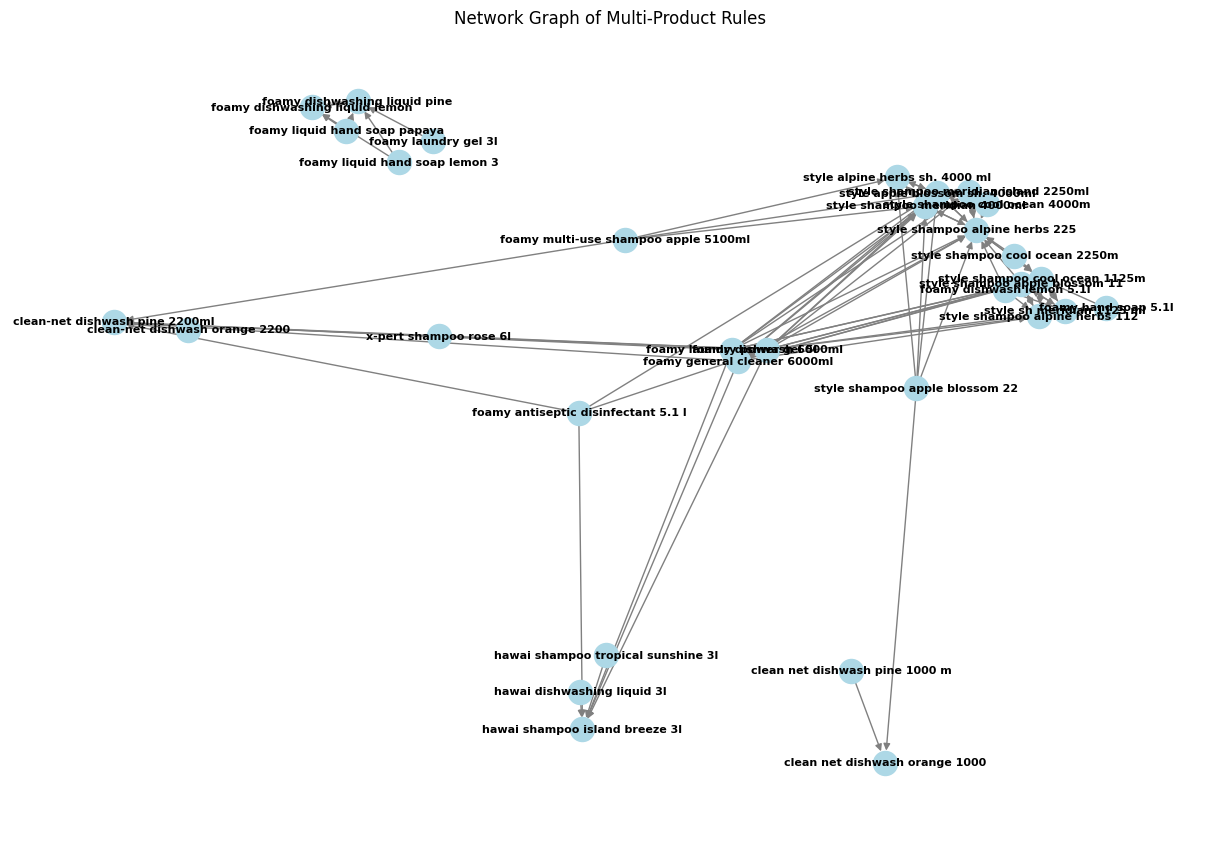

Rule with Highest Product Variety: ('foamy dishwash 6000ml', 'style shampoo meridian 4000ml') with variety count of 11


In [121]:
import networkx as nx
import matplotlib.pyplot as plt

def create_network_graph(dataframe):
    G = nx.DiGraph()

    for index, row in dataframe.iterrows():
        if is_multi_product_type_rule(row):
            antecedents = extract_product_descriptions(row['antecedents'])
            consequents = extract_product_descriptions(row['consequents'])

            for ant in antecedents:
                for cons in consequents:
                    G.add_edge(ant, cons)

    return G

# Create the network graph
G = create_network_graph(high_metric_rules)

# Draw the network graph
plt.figure(figsize=(12, 8))
nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray', font_size=8, font_weight='bold')
plt.title("Network Graph of Multi-Product Rules")
plt.show()

# Find the rule(s) with the highest product variety
# Product variety can be defined as the number of unique nodes (products) a rule (edge) is connected to
edge_variety = {edge: len(set(G.neighbors(edge[0])).union(set(G.neighbors(edge[1])))) for edge in G.edges}
highest_variety_rule = max(edge_variety, key=edge_variety.get)
print("Rule with Highest Product Variety:", highest_variety_rule, "with variety count of", edge_variety[highest_variety_rule])


In [129]:
def calculate_rule_metrics(dataframe):
    rule_metrics = []

    for index, row in dataframe.iterrows():
        if is_multi_product_type_rule(row):
            antecedents = extract_product_descriptions(row['antecedents'])
            consequents = extract_product_descriptions(row['consequents'])

            # Calculate product variety and length of consequents
            variety = len(set(antecedents + consequents))
            cons_length = len(consequents)

            rule_metrics.append({'index': index, 'variety': variety, 'cons_length': cons_length})

    return rule_metrics

# Calculate metrics for each rule
metrics = calculate_rule_metrics(high_metric_rules)

# Sort rules by product variety first, then by length of consequents
sorted_rules = sorted(metrics, key=lambda x: (x['variety'], x['cons_length']), reverse=True)

# Display the top rules
print("Top Rules Based on Product Variety and Length of Consequents:")
for rule in sorted_rules[:10]:  # Display top 10 rules
    print(f"Rule {rule['index']}: Variety = {rule['variety']}, Consequents Length = {rule['cons_length']}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Top Rules Based on Product Variety and Length of Consequents:
Rule 2857: Variety = 6, Consequents Length = 2
Rule 244: Variety = 6, Consequents Length = 1
Rule 665: Variety = 6, Consequents Length = 1
Rule 1300: Variety = 6, Consequents Length = 1
Rule 1624: Variety = 6, Consequents Length = 1
Rule 1693: Variety = 6, Consequents Length = 1
Rule 1975: Variety = 6, Consequents Length = 1
Rule 2633: Variety = 6, Consequents Length = 1
Rule 2637: Variety = 6, Consequents Length = 1
Rule 2881: Variety = 6, Consequents Length = 1


In [122]:
import pandas as pd
import ast  # for safely evaluating strings as Python expressions

# Assuming 'df' is your original DataFrame with 'Item Number' and 'product_type'

# Creating a dictionary to map Item Number to product type
product_type_map = df.set_index('Item Description')['product_type'].to_dict()

# Function to safely convert string representation of sets to actual sets
def str_to_set(s):
    try:
        return set(ast.literal_eval(s))
    except ValueError:
        return set()

# Modified function to identify multi-product type rules
def is_multi_product_type(row):
    # Convert antecedents and consequents from string to set
    antecedents = str_to_set(row['antecedents'])
    consequents = str_to_set(row['consequents'])

    # Combine antecedents and consequents
    all_items = antecedents.union(consequents)

    # Get unique product types for all items in the rule
    unique_types = {product_type_map.get(item, None) for item in all_items}

    # Check if there are multiple unique product types in the rule
    return len(unique_types) > 1

# Apply the function to the rules DataFrame
multi_product_type_rules = high_metric_rules.copy()
multi_product_type_rules['is_multi_product'] = multi_product_type_rules.apply(is_multi_product_type, axis=1)

# Filter for multi-product type rules
multi_product_type_rules = multi_product_type_rules[multi_product_type_rules['is_multi_product']]

# Print the multi-product type rules
print("Multi-Product Type Rules:")
print(multi_product_type_rules)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Multi-Product Type Rules:
Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric, is_multi_product]
Index: []


#Main Shit

In [124]:
import os
os.chdir('/content/drive/MyDrive/Capstone')
import pandas as pd

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [125]:
import pandas as pd
rules_pruned = pd.read_csv("/content/drive/MyDrive/Capstone/rules_pruned.csv")
rules = rules_pruned

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [126]:
import pandas as pd

# Assuming 'rules' is your DataFrame containing association rules

# Sort the rules by 'lift' and 'confidence', and take the top x
top_rules = rules.sort_values(by=['lift', 'confidence'], ascending=[False, False]).head(1000)

# Display the top rules
print(top_rules)


                                             antecedents  \
2148   frozenset({'style alpine herbs sh. 4000 ml', '...   
14934  frozenset({'style alpine herbs shampo 2250', '...   
4913   frozenset({'style shampoo apple blossom 22', '...   
12147  frozenset({'style alpine herbs shampo 2250', '...   
2149   frozenset({'style shampoo apple blossom 22', '...   
...                                                  ...   
29883  frozenset({'style shampoo apple blossom 11', '...   
18198  frozenset({'style alpine herbs sh. 4000 ml', '...   
36183  frozenset({'style shampoo cool ocean 2250m', '...   
34523  frozenset({'style shampoo cool ocean 1125m', '...   
22476  frozenset({'style shampoo apple blossom 11', '...   

                                             consequents  antecedent support  \
2148   frozenset({'style alpine herbs shampo 2250', '...            0.011360   
14934  frozenset({'style alpine herbs sh. 4000 ml', '...            0.013924   
4913   frozenset({'style alpine herbs s

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


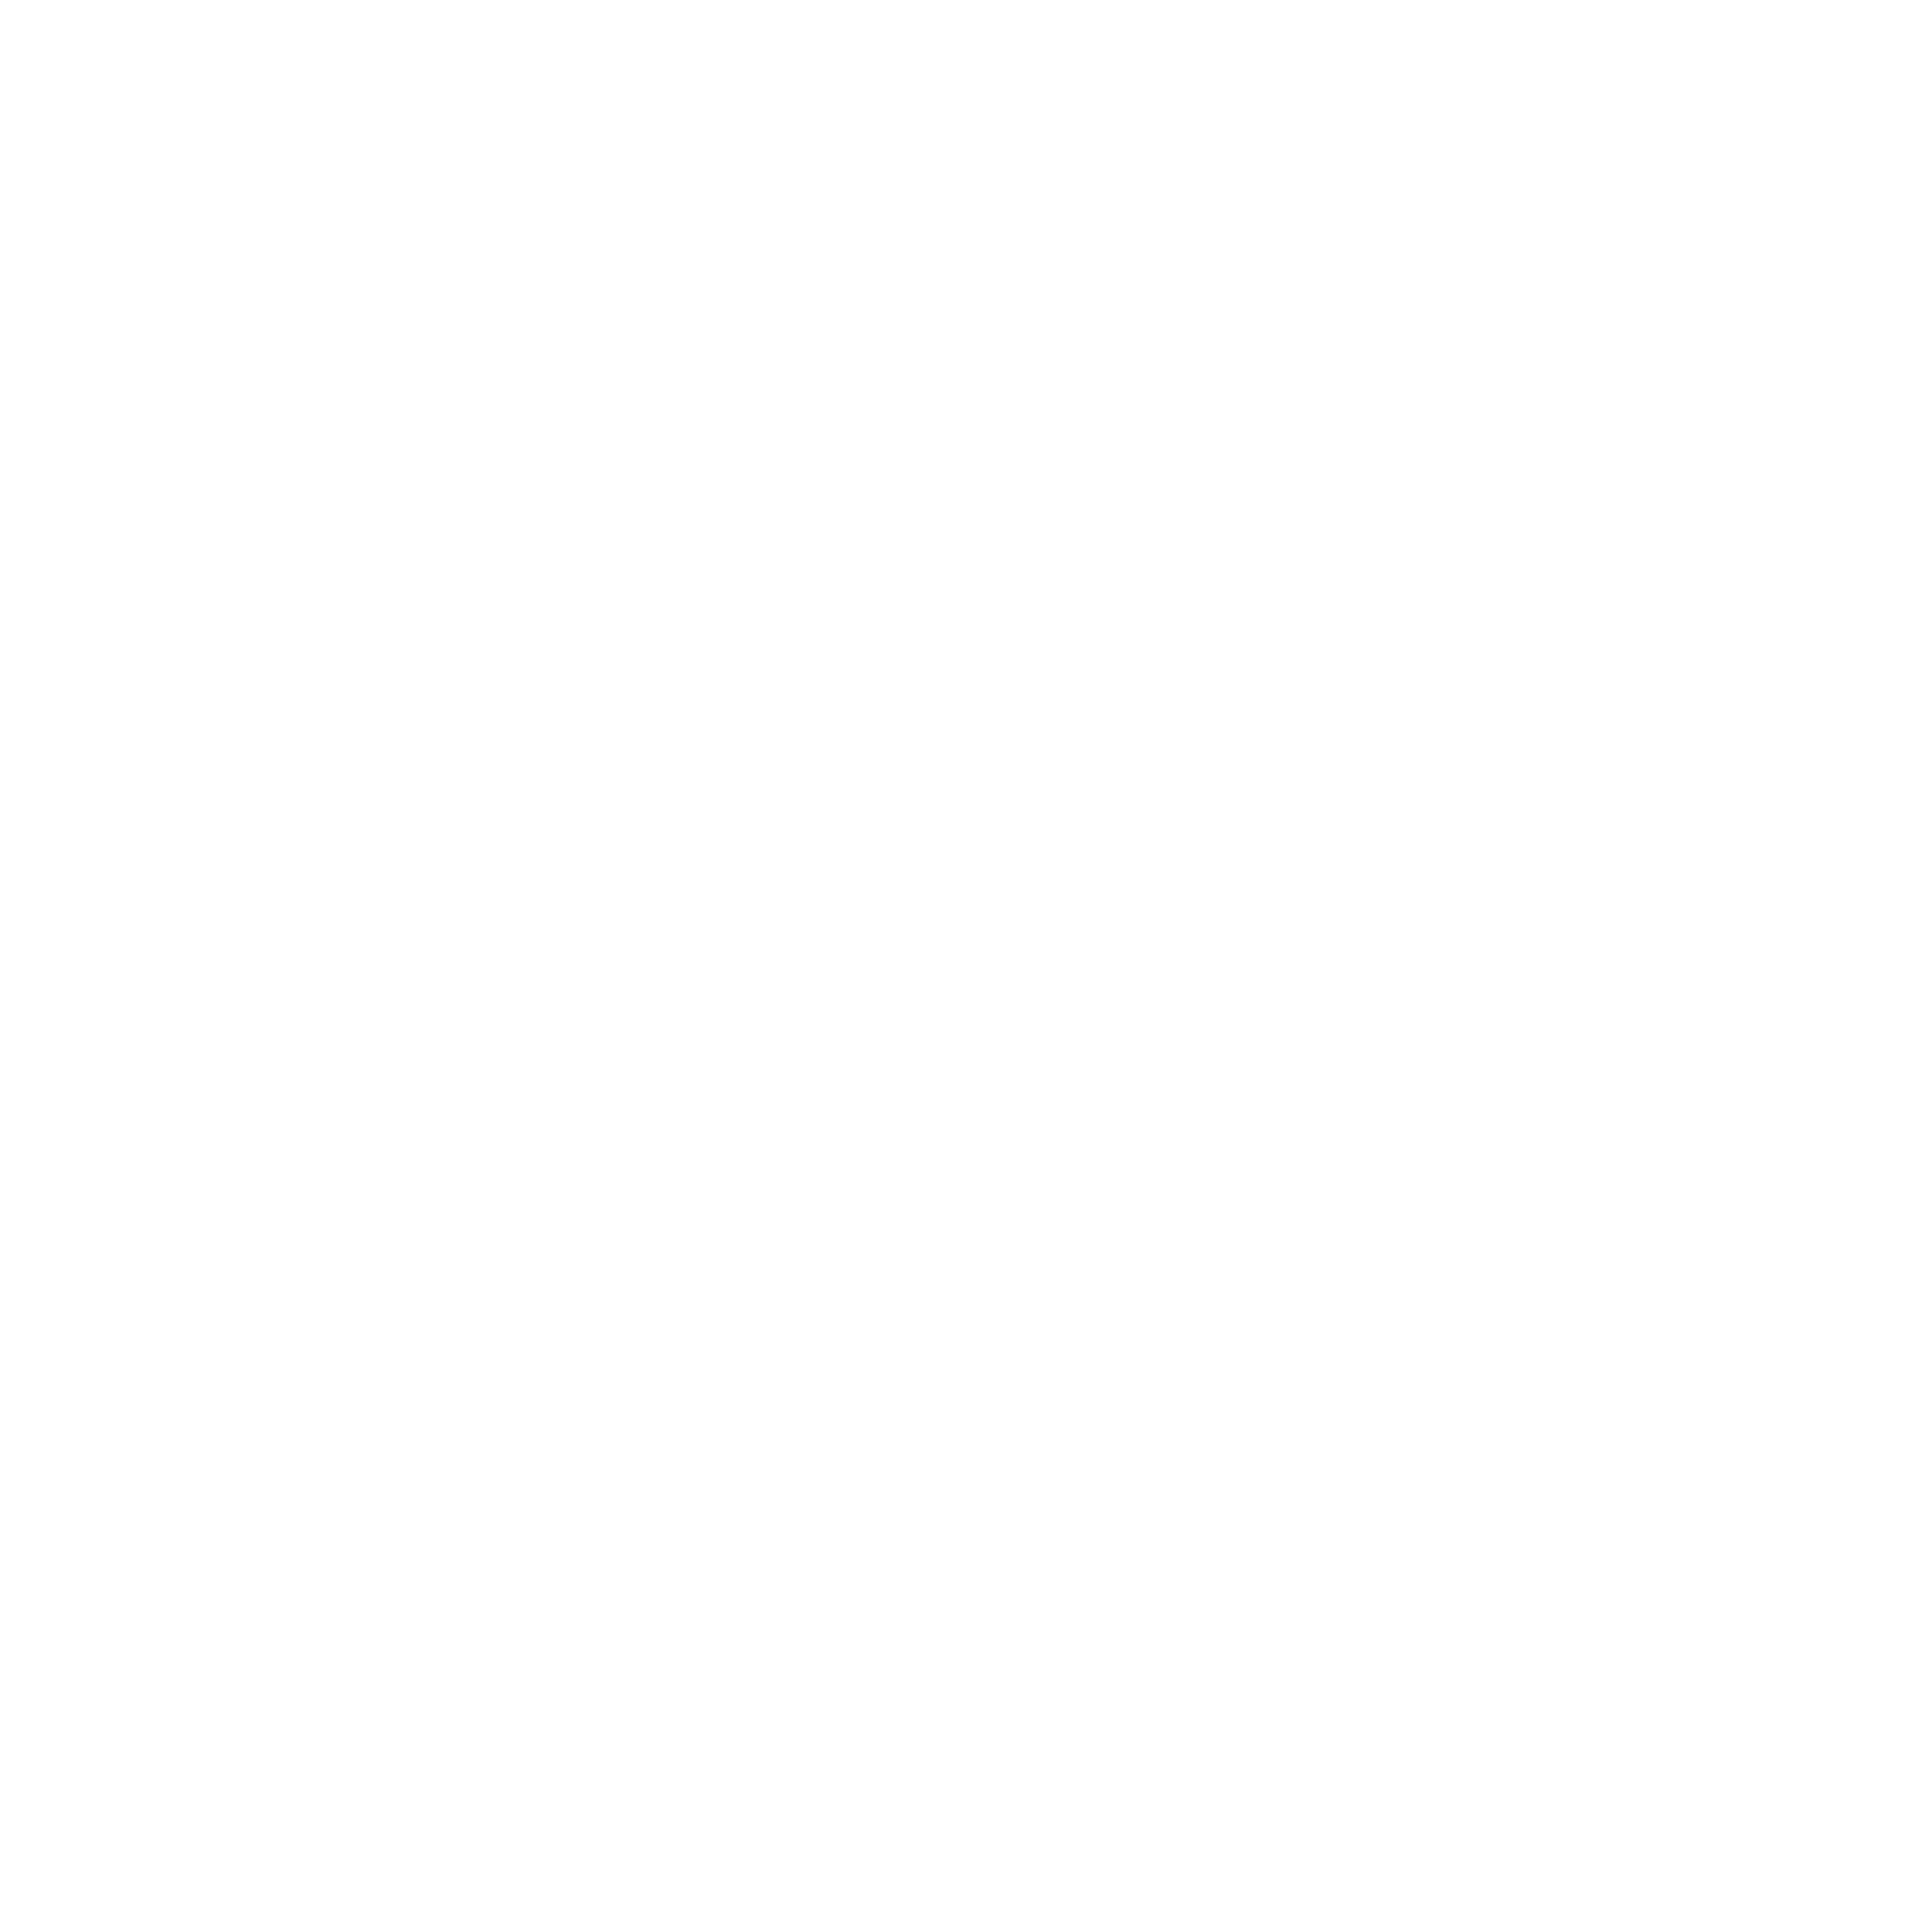

In [127]:
import networkx as nx
import matplotlib.pyplot as plt

# Increase figure size
plt.figure(figsize=(20, 20))

# Create the graph
G = nx.DiGraph()

# Here we assume 'top_rules' is already filtered for top 50 by lift and confidence.
# Add edges to the graph
for _, row in top_rules.iterrows():
    antecedents = str_to_set(row['antecedents'])
    consequents = str_to_set(row['consequents'])
    for ant in antecedents:
        for cons in consequents:
            if ant != cons:  # Avoid self-loops
                G.add_edge(ant, cons, weight=row['confidence'])  # Add confidence as weight

# Define node size map (optional, if you want to size by degree)
node_size_map = {node: G.degree(node) * 100 for node in G.nodes()}

# Choose a layout
pos = nx.kamada_kawai_layout(G)  # This layout tends to spread nodes more evenly

# Draw the network graph
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=[node_size_map[n] for n in G.nodes()],
        font_size=8, width=[(d['weight'] * 2) for (u, v, d) in G.edges(data=True)])

# Show plot
plt.show()


In [128]:
import networkx as nx
import matplotlib.pyplot as plt
# Create a new directed graph
G = nx.DiGraph()

# Add edges to the graph (each edge is an association rule)
for _, row in top_rules.iterrows():
    antecedents = row['antecedents']  # assuming this is already a set
    consequents = row['consequents']  # assuming this is already a set
    for ant in antecedents:
        for cons in consequents:
            G.add_edge(ant, cons)  # add more attributes if needed
# Calculate degree of each node and sort them
degree_dict = dict(G.degree(G.nodes()))
sorted_degree = sorted(degree_dict.items(), key=lambda item: item[1], reverse=True)

# Print the top nodes with highest degree
print("Top nodes by degree:")
for node, degree in sorted_degree[:10]:  # adjust the slice for how many top nodes you want
    print(f"{node}: {degree}")
# Import community detection library
import community as community_louvain

# Detect communities in the graph
partition = community_louvain.best_partition(G)

# Create a new graph to visualize the communities
community_graph = nx.Graph()

# Add nodes with community labels
for node, comm_id in partition.items():
    community_graph.add_node(node, community=comm_id)

# Add edges from the original graph to the community graph
community_graph.add_edges_from(G.edges())

# Draw the community graph
pos = nx.spring_layout(community_graph)
plt.figure(figsize=(20, 20))
nx.draw(community_graph, pos, node_color=list(partition.values()), node_size=40, cmap=plt.cm.jet)
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Top nodes by degree:
f: 82
r: 82
o: 82
z: 82
e: 82
n: 82
s: 82
t: 82
(: 82
{: 82


AttributeError: ignored

#can sleep for now

In [ ]:
# Assuming 'product_type_map' is correctly defined with 'Item Description' as keys and 'product_type' as values
# Assuming 'df' has columns 'Item Description' that matches the items in the rules' sets and 'product_type'
product_type_map = df.set_index('Item Description')['product_type'].to_dict()

def is_cross_type(row):
    # Combine all items from antecedents and consequents
    all_items = row['antecedents'] | row['consequents']

    # Determine product types for all items
    product_types = {product_type_map.get(item, None) for item in all_items}

    # Check if there is more than one unique product type
    return len(product_types) > 1

# Apply the function to each rule to find cross-type rules
cross_type_rules = rules[rules.apply(is_cross_type, axis=1)]

# Output the number of cross-type rules found
print(f"Number of cross-type rules found: {len(cross_type_rules)}")

# Check for the number of cross-type rules found
print(f"Number of cross-type rules found: {len(cross_type_rules)}")

# Proceed to visualize the top 10 cross-type rules if any are found
if not cross_type_rules.empty:
    top_cross_type_rules = cross_type_rules.sort_values(by=['lift', 'confidence'], ascending=[False, False]).head(10)

    # Create the graph
    G = nx.DiGraph()

    # Add edges to the graph for the top cross-type rules
    for _, row in top_cross_type_rules.iterrows():
        antecedents = set(ast.literal_eval(row['antecedents']))
        consequents = set(ast.literal_eval(row['consequents']))
        for ant in antecedents:
            for cons in consequents:
                # Add edge if antecedent and consequent are not the same
                if ant != cons:
                    G.add_edge(ant, cons)

    # Draw the graph
    plt.figure(figsize=(12, 12))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=1000, node_color="lightblue", linewidths=0.5, font_size=10, arrowsize=20)
    plt.title('Network Graph of Top 10 Cross-Type Rules')
    plt.show()
else:
    print("No cross-type rules to visualize.")


In [ ]:
# Assuming 'df' contains the original data with the 'product_type' column mapped properly

# Create a mapping from items to product types
product_type_map = df.set_index('Item Number')['product_type'].to_dict()

# Function to check if a rule contains multiple product types
def is_cross_type(row):
    antecedent_types = {product_type_map.get(item, None) for item in row['antecedents']}
    consequent_types = {product_type_map.get(item, None) for item in row['consequents']}
    return len(antecedent_types.union(consequent_types)) > 1

# Apply the function to filter for cross-type rules
cross_type_rules = top_rules[top_rules.apply(is_cross_type, axis=1)]

# Now, cross_type_rules will contain only those rules that involve multiple product types
top_10_cross_type_rules = cross_type_rules.head(10)
print("Top 10 Cross-Type Rules:")
print(top_10_cross_type_rules)


In [ ]:
# Correctly convert strings to sets
def convert_to_set(x):
    if isinstance(x, str):
        try:
            # Directly evaluate the string representation of a set
            return ast.literal_eval(x)
        except ValueError:
            return set()
    elif isinstance(x, set):
        return x
    else:
        return set()

# Apply conversion to the 'antecedents' and 'consequents' columns
rules['antecedents'] = rules['antecedents'].apply(convert_to_set)
rules['consequents'] = rules['consequents'].apply(convert_to_set)

# Updated function to check for cross-type rules
def is_cross_type(row):
    ant_types = {product_type_map[item] for item in row['antecedents']}
    cons_types = {product_type_map[item] for item in row['consequents']}
    return not ant_types.isdisjoint(cons_types)

# Apply the function to filter for cross-type rules
cross_type_rules = rules[rules.apply(is_cross_type, axis=1)]

# Proceed only if there are cross-type rules
if not cross_type_rules.empty:
    # Sort the cross-type rules by 'lift' and 'confidence', and select the top 10
    top_cross_type_rules = cross_type_rules.sort_values(by=['lift', 'confidence'], ascending=[False, False]).head(10)

    # Create a new directed graph
    G = nx.DiGraph()

    # Add edges to the graph for the top cross-type rules
    for _, row in top_cross_type_rules.iterrows():
        antecedents = row['antecedents']
        consequents = row['consequents']
        for ant in antecedents:
            for cons in consequents:
                if ant != cons:  # Avoid self-loops
                    G.add_edge(ant, cons)

    # If the graph has nodes, draw it
    if len(G.nodes) > 0:
        plt.figure(figsize=(15, 15))
        pos = nx.spring_layout(G, k=0.5, iterations=20)  # Layout that tries to space nodes evenly
        nx.draw(G, pos, with_labels=True, node_size=2500, node_color='lightblue', font_size=12, arrows=True)
        plt.title('Network Graph of Top 10 Cross-Type Rules')
        plt.show()
    else:
        print("No cross-type rules found.")
else:
    print("No cross-type rules to display.")


In [ ]:
# # Assuming 'product_type_map' and 'top_rules' are already defined

# # Function to check if a rule contains multiple product types
# def is_cross_type(row):
#     ant_types = {product_type_map[item] for item in row['antecedents']}
#     cons_types = {product_type_map[item] for item in row['consequents']}
#     return len(ant_types.union(cons_types)) > 1

# # Apply the function to filter for cross-type rules
# cross_type_rules = top_rules[top_rules.apply(is_cross_type, axis=1)]

# # Check the top 10 cross-type rules
# top_10_cross_type_rules = cross_type_rules.head(10)
# print("Top 10 Cross-Type Rules:")
# print(top_10_cross_type_rules)


In [ ]:
import pandas as pd

# Assuming df is your DataFrame

# Get distinct values for 'product_types'
distinct_product_types = df['product_type'].unique()

# Get distinct values for 'categories'
distinct_categories = df['Category'].unique()

# Get distinct values for 'subcategories'
distinct_subcategories = df['Subcategory'].unique()

# You can print these values or store them as needed
print("Distinct Product Types:", distinct_product_types)
print("Distinct Categories:", distinct_categories)
print("Distinct Subcategories:", distinct_subcategories)
